**5 Days of historical data**

In [3]:
# import dependencies
import yfinance as yf
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [2]:

tickers = ['NVDA', 'AAPL', 'MSFT', 'LLY', 'UNH', 'JNJ', 'BRK-B', 'JPM', 'V', 'XOM', 'CVX', 'COP', 'AMZN', 'TSLA', 'HD']
print(tickers)

['NVDA', 'AAPL', 'MSFT', 'LLY', 'UNH', 'JNJ', 'BRK-B', 'JPM', 'V', 'XOM', 'CVX', 'COP', 'AMZN', 'TSLA', 'HD']


In [4]:
recent_historical_data = {}

for ticker in tickers:
    
    # Initialize the ticker object
    stock = yf.Ticker(ticker)

    # Retrieve 5 years of historical market data for the current ticker
    recent_historical_data[ticker] = stock.history(period="5d")

    # Add the ticker symbol as a column to the DataFrame
    recent_historical_data[ticker]['Symbol'] = ticker


In [5]:
# Create a DataFrame for the historical data
recent_historical_df = pd.concat(recent_historical_data, axis = 0)

# Display the first 5 and last 5 rows of the DataFrame
display(recent_historical_df.head(5))
display(recent_historical_df.tail(5))

Open        High         Low  \
     Date                                                            
NVDA 2024-11-13 00:00:00-05:00  149.070007  149.330002  145.899994   
     2024-11-14 00:00:00-05:00  147.639999  149.000000  145.550003   
     2024-11-15 00:00:00-05:00  144.869995  145.240005  140.080002   
     2024-11-18 00:00:00-05:00  139.500000  141.550003  137.149994   
     2024-11-19 00:00:00-05:00  141.324997  145.600006  140.990005   

                                     Close     Volume  Dividends  \
     Date                                                          
NVDA 2024-11-13 00:00:00-05:00  146.270004  191903300        0.0   
     2024-11-14 00:00:00-05:00  146.759995  194463300        0.0   
     2024-11-15 00:00:00-05:00  141.979996  250132900        0.0   
     2024-11-18 00:00:00-05:00  140.149994  221205300        0.0   
     2024-11-19 00:00:00-05:00  145.449997  137334123        0.0   

                                Stock Splits Symbol  
     Date                                            
NVDA 2024-11-13 00:00:00-05:00           0.0   NVDA  
     2024-11-14 00:00:00-05:00           0.0   NVDA  
     2024-11-15 00:00:00-05:00           0.0   NVDA  
     2024-11-18 00:00:00-05:00           0.0   NVDA  
     2024-11-19 00:00:00-05:00           0.0   NVDA

Open        High         Low       Close  \
   Date                                                                        
HD 2024-11-13 00:00:00-05:00  409.130005  412.739990  406.720001  410.190002   
   2024-11-14 00:00:00-05:00  408.000000  411.500000  404.390015  405.720001   
   2024-11-15 00:00:00-05:00  402.899994  408.910004  402.899994  408.179993   
   2024-11-18 00:00:00-05:00  405.500000  412.540009  403.950012  410.440002   
   2024-11-19 00:00:00-05:00  408.380005  409.160004  399.359985  408.339996   

                               Volume  Dividends  Stock Splits Symbol  
   Date                                                                
HD 2024-11-13 00:00:00-05:00  3083100        0.0           0.0     HD  
   2024-11-14 00:00:00-05:00  3348100        0.0           0.0     HD  
   2024-11-15 00:00:00-05:00  3239500        0.0           0.0     HD  
   2024-11-18 00:00:00-05:00  3394300        0.0           0.0     HD  
   2024-11-19 00:00:00-05:00  1486569        0.0           0.0     HD

In [6]:
# The dataframe has multiple indices.  So, we need to drop the first and just keep the Date as index
recent_historical_df = recent_historical_df.reset_index(level=0, drop=True)

# Convert the index to datetime
recent_historical_df.index = pd.to_datetime(recent_historical_df.index)

# Remove the timestamp and keep only the date part
recent_historical_df.index = recent_historical_df.index.date

# Display the DataFrame to check
display(recent_historical_df.head())

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol
2024-11-13,149.070007,149.330002,145.899994,146.270004,191903300,0.0,0.0,NVDA
2024-11-14,147.639999,149.000000,145.550003,146.759995,194463300,0.0,0.0,NVDA
2024-11-15,144.869995,145.240005,140.080002,141.979996,250132900,0.0,0.0,NVDA
2024-11-18,139.500000,141.550003,137.149994,140.149994,221205300,0.0,0.0,NVDA
2024-11-19,141.324997,145.600006,140.990005,145.449997,137334123,0.0,0.0,NVDA


In [7]:
recent_historical_df['Percent Change (%)'] = recent_historical_df.groupby('Symbol')['Close'].pct_change() * 100
recent_historical_df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Percent Change (%)
2024-11-13,149.070007,149.330002,145.899994,146.270004,191903300,0.0,0.0,NVDA,NaN
2024-11-14,147.639999,149.000000,145.550003,146.759995,194463300,0.0,0.0,NVDA,0.334990
2024-11-15,144.869995,145.240005,140.080002,141.979996,250132900,0.0,0.0,NVDA,-3.257018
2024-11-18,139.500000,141.550003,137.149994,140.149994,221205300,0.0,0.0,NVDA,-1.288915
2024-11-19,141.324997,145.600006,140.990005,145.449997,137334123,0.0,0.0,NVDA,3.781665
2024-11-13,224.009995,226.649994,222.759995,225.119995,48566200,0.0,0.0,AAPL,NaN
2024-11-14,225.020004,228.869995,225.000000,228.220001,44923900,0.0,0.0,AAPL,1.377046
2024-11-15,226.399994,226.919998,224.270004,225.000000,47923700,0.0,0.0,AAPL,-1.410920
2024-11-18,225.250000,229.740005,225.169998,228.020004,44633700,0.0,0.0,AAPL,1.342224
2024-11-19,226.794998,230.160004,226.660004,229.899994,17653179,0.0,0.0,AAPL,0.824485


In [8]:
recent_historical_df['Percent Change (%)'] = recent_historical_df['Percent Change (%)'].fillna(0)
recent_historical_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Percent Change (%)
2024-11-13,149.070007,149.330002,145.899994,146.270004,191903300,0.0,0.0,NVDA,0.000000
2024-11-14,147.639999,149.000000,145.550003,146.759995,194463300,0.0,0.0,NVDA,0.334990
2024-11-15,144.869995,145.240005,140.080002,141.979996,250132900,0.0,0.0,NVDA,-3.257018
2024-11-18,139.500000,141.550003,137.149994,140.149994,221205300,0.0,0.0,NVDA,-1.288915
2024-11-19,141.324997,145.600006,140.990005,145.449997,137334123,0.0,0.0,NVDA,3.781665


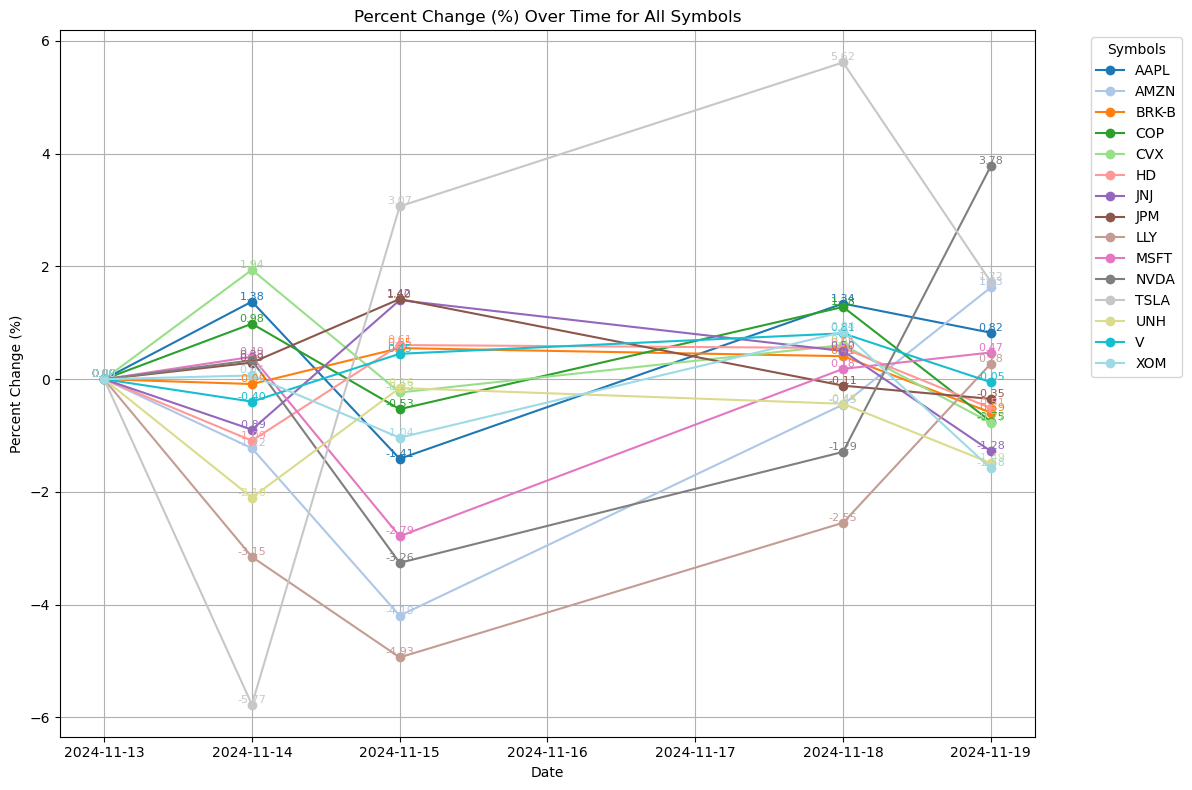

In [9]:

# Group the DataFrame by 'Symbol'
grouped_df = recent_historical_df.groupby('Symbol')

# Create a figure
plt.figure(figsize=(12, 8))

# Generate a color map with enough distinct colors
colors = cm.tab20(np.linspace(0, 1, len(grouped_df)))  # Choose a colormap with many colors

# Loop through each group and plot the data
for (symbol, group), color in zip(grouped_df, colors):
    plt.plot(group.index, group['Percent Change (%)'], marker='o', label=symbol, color=color)
    
    # Add labels for each data point
    for i, row in group.iterrows():
        plt.text(
            i,  # x-coordinate (index)
            row['Percent Change (%)'],  # y-coordinate
            f"{row['Percent Change (%)']:.2f}",  # Text label with 2 decimal places
            fontsize=8,  # Font size for the labels
            color=color,  # Match label color to the line color
            ha='center',  # Horizontal alignment
            va='bottom'   # Vertical alignment
        )

# Add title and labels
plt.title("Percent Change (%) Over Time for All Symbols")
plt.xlabel("Date")
plt.ylabel("Percent Change (%)")

# Add grid and legend
plt.grid(True)
plt.legend(title="Symbols", bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()
